# Градиентный спуск
Gradient Decent

$$f(x) \longrightarrow  \displaystyle \min_{x} $$
<br>
$$x_{t+1} = x_t-\alpha{f'(x_t)}$$
<br>
$$f_{t+1}(x) = f(x_t-\alpha{f'(x_t)})$$

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


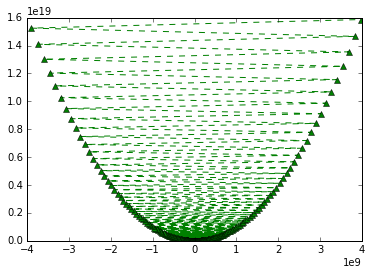

In [4]:
%matplotlib inline
%pylab inline

def func(x):
    return x ** 2

def derivative(x):
    return 2 * x


x_coord = np.linspace(-10, 10, 100)
_ = plot(x_coord, [func(x) for x in x_coord])

start_point = 10

alpha = 1.01
gradient_steps = [start_point]
for i in xrange(1000):
    old_point = gradient_steps[-1]
    new_point = old_point - alpha * derivative(old_point)
    gradient_steps.append(new_point)

_ = plot(gradient_steps, 
         [func(x) for x in gradient_steps], 'g--^',)

<img src="imgs/gradient-descent.png">

Визуализация градиентного спуска: https://www.youtube.com/watch?v=OWzkRD6MjYI

# Градиентный бустинг

$b_t(x)$ - ответ одного базового алгоритма (например, дерева), вещественное число для регрессии или [0, 1] - для классификации




Линейная комбинация базовых алгоритмов:
$$u(x) = \begin{equation*}
  \sum_{t=1}^{T+1} \alpha_t b_t(x)
\end{equation*}$$

Функционал качества с произвольной функицей потерь $L(u(x), y)$:
$$ Q(\overline u, \overline y) = \sum_{i=1}^{l} L\Bigl(u(x_i), y_i\Bigr) =   \begin{equation*}
  \sum_{i=1}^{l} L\Bigl(\sum_{t=1}^{T}\alpha_t b_t(x_i) + \alpha_{T+1} b_{T+1}(x_i), y_i\Bigr)
\end{equation*} \longrightarrow  \displaystyle \min_{\overline b, \overline \alpha} $$

Для регрессии L определяется как 
$$L == MSE == (y_i - u(x_i))^2$$
<center>или</center><br>
$$L == MAE == |y_i - u(x_i)|$$

Для классификации:
$$L = [ (u(x_i) - 0.5) \cdot (y_i - 0.5) ]_{-}$$

Еще раз посмотрим на 2 формулы:
    
$$ L_{T+1}(\overline u, \overline y) =  L\Bigl(\begin{equation*}
   \sum_{t=1}^{T}\alpha_t b_t(x_i) + \alpha_{T+1} b_{T+1}(x_i), y_i\Bigr)
\end{equation*} $$

$$L_{t+1}(u) = L(u_t-\alpha{L'(u_t)})$$

Но мы не можем просто так приравнять $b_{T+1}(x_i)$ к $-L'(u_t)$
<br> 
Давайте попробуем построить дерево, которое будет очень похоже на $L'(u_t)$ на обучающей выборке. 
<br>
Обучаемся на $\Bigl[x_i, −L'(u_t(x_i))\Bigr]$ и получим таким образом $b_{T+1}$

Есть еще одна проблема: $L$ для классификации не дифференцируема по $x_i$. Заменим ее на мажорирующую:

<img src="imgs/2.jpg" width=500>

# Пример использования:     

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9555555555555556

## XGBoost:

In [7]:
from xgboost import XGBClassifier
clf = XGBClassifier() 
clf.fit(X_train, y_train)
clf.score(X_test, y_test) 

0.93333333333333335

### Важные параметры:

http://xgboost.readthedocs.io/en/latest/python/python_api.html

objective={"reg:linear", "reg:logistic", 
           "multi:softmax", "multi:softprob", 
           "rank:pairwise", "....etc"}  <br>
           
    -loss-функция. Можно написать самостоятельно

<i> learning_rates </i> - можно настроить убывающую скорость<br>
<i> max_depth </i> - максимальная глубина дерева. Слишком большая глубина ведет к переобучению<br>
<i> subsample, colsample_bytree, colsample_bylevel </i> - сэмплирование по объектам и признакам<br>
<i> min_child_weight </i> - минимальная сумма весов в листе<br>
<i> scale_pos_weight </i> - вес целого класса, используется если один класс заметно чаще встречается, чем другой<br>

Как настраивать: 
    
* Выбираем относительно большой learning_rate ($ \eta \in [0.05, 0.3]$), подбираем оптимальное число деревьев для выбранного $ \eta $

* Настраиваем параметры деревьев, начиная с самых значимых (max_depth, min_child_weight, gamma, subsample, colsample_bytree)

* Настраиваем регуляризации ($ \lambda, \alpha $)

* Уменьшаем learning_rate, пропорционально увеличиваем число деревьев

<a href="https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/">Complete Guide to Parameter Tuning in XGBoost (with codes in Python) </a>

<a href="https://arogozhnikov.github.io/2016/07/05/gradient_boosting_playground.html">Визуализация градиентного бустинга</a>

## CatBoost:

In [8]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.66666666666666663

In [2]:
# initialize data
train_data = np.random.randint(0, 100, size=(100, 10))
train_label = np.random.randint(0, 2, size=(100))
test_data = np.random.randint(0, 100, size=(50, 10))
# specify the training parameters 
model = CatBoostClassifier(iterations=2, depth=2, learning_rate=1, loss_function='Logloss', verbose=True)
#train the model
model.fit(train_data, train_label, cat_features=[0,2,5], verbose=True)
# make the prediction using the resulting model
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
print("class = ", preds_class)
print("proba = ", preds_proba)

Borders generated
0:	learn 0.6802920002passed: 0.0132 sec	total: 14.7ms	remaining: 14.7ms
1:	learn 0.6030729109passed: 0.0106 sec	total: 25.6ms	remaining: 0us
('class = ', array([ 0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.]))
('proba = ', array([[ 0.71428502,  0.28571498],
       [ 0.44444445,  0.55555555],
       [ 0.44444445,  0.55555555],
       [ 0.44444445,  0.55555555],
       [ 0.44444445,  0.55555555],
       [ 0.44444445,  0.55555555],
       [ 0.71428502,  0.28571498],
       [ 0.71428502,  0.28571498],
       [ 0.71428502,  0.28571498],
       [ 0.44444445,  0.55555555],
       [ 0.44444445,  0.55555555],
       [ 0.44444445,  0.55555555],
       [ 0.44444445,  0.55555555],
       [ 0.44444445,  0.55555555],
       [ 0.71428502,  0.28571498],
       [ 0